<a href="https://colab.research.google.com/github/MuneerHussain01/Forgery-Detection-in-Medical-Images/blob/main/forgery_detection_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Load dataset**

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os

# Define the path to the downloaded zip file and the extraction path
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/archive.zip'
extracted_path = '/content/'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# Display a list of extracted folders
extracted_folders = [name for name in os.listdir(extracted_path) if os.path.isdir(os.path.join(extracted_path, name))]
print("Extracted folders:", extracted_folders)


Extracted folders: ['.config', '3bzv6t24ts-1', 'drive', 'sample_data']


In [ ]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
import cv2
import tensorflow as tf

#**2. Label the data**

In [ ]:

X_train = []
Y_train = []
image_size = 150
labels = ['COVID-19','F CM COVID-19', 'F CM Normal', 'F CM Viral','F S Normal','F S Viral','Normal','Viral']
for i in labels:
    folderPath = os.path.join('/content/3bzv6t24ts-1/covid/9classes',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

**2.1. check label**

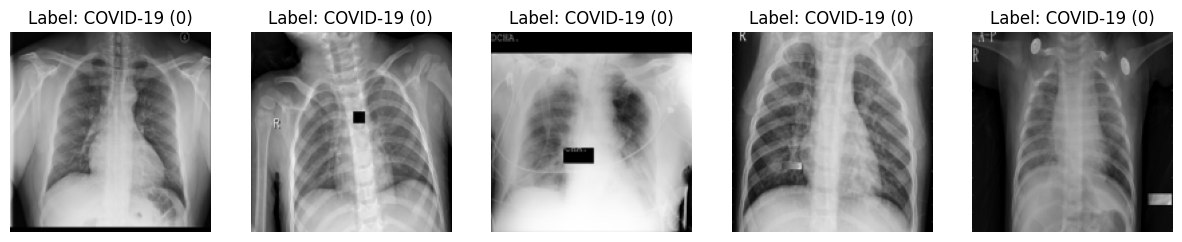

In [ ]:

# Function to visualize random images and their labels
def visualize_random_images(X, Y, labels, num_images=5):
    # Select random indices
    random_indices = random.sample(range(len(X)), num_images)

    # Plot the images
    plt.figure(figsize=(15, 5))
    for i, index in enumerate(random_indices, 1):
        plt.subplot(1, num_images, i)
        plt.imshow(X[index])

        # Convert one-hot encoded label back to numeric label
        numeric_label = np.argmax(Y[index])

        plt.title(f"Label: {labels[numeric_label]} ({numeric_label})")
        plt.axis('off')

    plt.show()

# Visualize random images
visualize_random_images(X_train, Y_train, labels)



**2.2.shuffle**

In [ ]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(13540, 150, 150, 3)

**2.3 Split Training and Testing**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.25,random_state=101)

**2.4 One-hot encoding**

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

#**3. CNN Model**

In [ ]:
epochs=10
batch_size=40

In [ ]:

# Define your CNN model
def build_cnn_model(input_shape):
    model = models.Sequential()

    # Input layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))

    # Additional dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(300, activation='relu', name='input_layer'))
    model.add(layers.Dense(150, activation='relu', name='hidden_layer_1'))
    model.add(layers.Dense(75, activation='relu', name='hidden_layer_2'))
    model.add(layers.Dense(50, activation='relu', name='hidden_layer_3'))
    model.add(layers.Dense(25, activation='relu', name='hidden_layer_4'))

    # Output layer
    model.add(layers.Dense(8, activation='softmax', name='output_layer'))  # 8 number of classes and softmax activation function

    return model

input_shape = (150, 150, 3)  # dimensions of images
cnn_model = build_cnn_model(input_shape)

# compile
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



**3.1 Train Model**

In [ ]:
# Train the model on your dataset
history = cnn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))


Epoch 1/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 24s 80ms/step - accuracy: 0.2372 - loss: 294.3256 - val_accuracy: 0.3560 - val_loss: 1.5887
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 36s 68ms/step - accuracy: 0.4477 - loss: 1.3064 - val_accuracy: 0.3675 - val_loss: 1.4388
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.5140 - loss: 1.0487 - val_accuracy: 0.3451 - val_loss: 1.4502
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - accuracy: 0.5621 - loss: 0.9357 - val_accuracy: 0.3297 - val_loss: 1.5470
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - accuracy: 0.5760 - loss: 0.8779 - val_accuracy: 0.2981 - val_loss: 1.6330
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.6134 - loss: 0.8056 - val_accuracy: 0.3043 - val_loss: 1.6920
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.6411 - loss: 0.7579 - val_accuracy: 0.2626 - val_loss: 1.7610
Epoch 8/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - accuracy: 0.6418 - loss: 0.7489 

**3.2 training and validation accuracy**

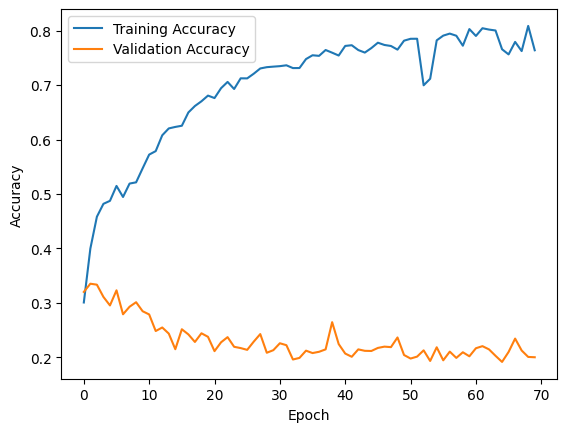

In [ ]:
#cnn_model.save('braintumor.h5')

# Visualize the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**3.3 training and validation loss**

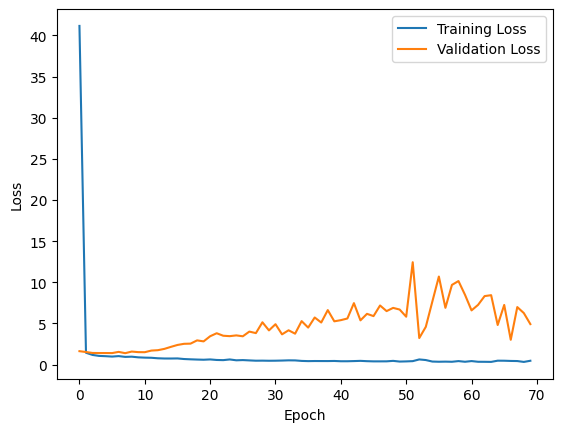

In [ ]:
# Visualize the training history for loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#**4. Predict Model**

In [ ]:
y_pred=cnn_model.predict(X_test)

106/106 [==============================] - 1s 8ms/step


**4.1 Calculate accuracy**

In [ ]:

# Convert them back to integer labels
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)


In [ ]:

# Calculate accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(accuracy)

0.2546528803545052


**4.2 Confusion Matrix**

In [ ]:

# Now, create a confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


**4.3 Model Reports**

In [ ]:


class_report=classification_report(y_test_labels, y_pred_labels, target_names=labels)


**Validation**

In [ ]:

img = image.load_img('/content/covid/F S Viral/xa (100).png')
plt.imshow(img,interpolation='nearest')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/covid/F S Viral/xa (100).png'

In [ ]:
img = cv2.imread('/content/3bzv6t24ts-1/covid/9classes/COVID-19/Image_1015.png.png')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

In [ ]:
a=cnn_model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


np.int64(0)

In [ ]:
if indices in [1, 2, 3, 4, 5, 6]:
    print("forgerd")
elif indices in [0, 7]:
    print("normal")


normal


**Generate overall reports**

In [ ]:
# Save results to a text file in the /content/ directory
output_file_path = '/content/results.txt'

with open(output_file_path, 'w') as file:
    file.write(f'Accuracy: {accuracy}\n\n')
    file.write('Confusion Matrix:\n')
    file.write(str(cm) + '\n\n')
    file.write('Classification Report:\n')
    file.write(class_report)

print(f'Results saved to: {output_file_path}')